<a href="https://colab.research.google.com/github/dory7137/Visiting-home-project/blob/main/COVID19_project/covid_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure you open it in Google Colab to see all the diagrams!

This jupyter notebook file contains the documentation of the code, show all the analysis and result and explicitly testing the code itself as runing all codeparts.

For this project I used the "JHU CSSE COVID-19 Data" url: https://github.com/CSSEGISandData/COVID-19

I also used these articles and code parts from towardsdatascience.com:
 
https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc

https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

https://towardsdatascience.com/infectious-disease-modelling-fit-your-model-to-coronavirus-data-2568e672dbc7


First, import all necessary libraries

In [4]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.integrate import odeint
!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

Read the data to a pandas dataframe from the .CSV files from the JHU CSSE COVID-19 github repository using pandas library.

Printing out these dataframes' first few rows to test the file reading.

In [5]:
confirmed_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [6]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,43240,43403,43628,43851,44228,44443,44503,44706,44988,45280
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742


In [7]:
deaths_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1617,1626,1638,1645,1650,1661,1675,1687,1695,1712
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,623,631,637,646,657,672,685,699,716,735
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2154,2168,2186,2206,2224,2236,2255,2272,2294,2309
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,322,324,328,332,333,334,336,337,337,338


In [8]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35092,35137,35160,35295,35350,35370,35422,35934,35976,36122
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12889,13453,13804,14216,14565,15055,15469,15842,16230,16666
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44633,45148,45148,46326,46962,47581,48183,48794,49421,50070
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4747,4830,4965,5055,5127,5239,5290,5358,5405,5503
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6444,6523,6582,6623,7062,7117,7273,7346,7351,7444


Choosing the Hungarian and Irish data

In [9]:
confirmed_ie_hu=confirmed_cases[(confirmed_cases["Country/Region"]=="Ireland") | (confirmed_cases["Country/Region"]=="Hungary") ].reset_index(drop=True)
deaths_ie_hu=deaths_cases[(deaths_cases["Country/Region"]=="Ireland") | (deaths_cases["Country/Region"]=="Hungary") ].reset_index(drop=True)
recovered_ie_hu=recovered_cases[(recovered_cases["Country/Region"]=="Ireland") | (recovered_cases["Country/Region"]=="Hungary") ].reset_index(drop=True)

Delete the columns that I won't use for this analysis

In [10]:
del confirmed_ie_hu["Province/State"]
del confirmed_ie_hu["Lat"]
del confirmed_ie_hu["Long"]

del deaths_ie_hu["Province/State"]
del deaths_ie_hu["Lat"]
del deaths_ie_hu["Long"]

del recovered_ie_hu["Province/State"]
del recovered_ie_hu["Lat"]
del recovered_ie_hu["Long"]

Pivoting the tables. It makes the visualisation part easier. 

Print out the last part of the data to test the pivoting.

In [11]:
confirmed_ie_hu=confirmed_ie_hu.pivot_table(columns=["Country/Region"]).reset_index()
confirmed_ie_hu.rename(columns = {'index': "Date", "Hungary": "Hungary_C", "Ireland": "Ireland_C"}, inplace=True)
confirmed_ie_hu['Date']=pd.to_datetime(confirmed_ie_hu['Date'],format='%m/%d/%y') 
confirmed_ie_hu.sort_values(by= 'Date').reset_index(inplace=True)
confirmed_ie_hu.tail()

Country/Region,Date,Hungary_C,Ireland_C
303,2020-09-05,7892,29534
304,2020-09-06,8387,29672
305,2020-09-07,8963,29774
306,2020-09-08,9304,30080
307,2020-09-09,9715,30164


In [12]:
deaths_ie_hu=deaths_ie_hu.pivot_table(columns=["Country/Region"]).reset_index(drop=False)
deaths_ie_hu.rename(columns = {'index': "Date", "Hungary": "Hungary_D", "Ireland": "Ireland_D"}, inplace=True)
deaths_ie_hu['Date']=pd.to_datetime(deaths_ie_hu['Date'],format='%m/%d/%y') 
deaths_ie_hu=deaths_ie_hu.sort_values(by= 'Date')
deaths_ie_hu.set_index("Date", inplace = True)
confirmed_ie_hu.tail()

Country/Region,Date,Hungary_C,Ireland_C
303,2020-09-05,7892,29534
304,2020-09-06,8387,29672
305,2020-09-07,8963,29774
306,2020-09-08,9304,30080
307,2020-09-09,9715,30164


In [13]:
recovered_ie_hu=recovered_ie_hu.pivot_table(columns=["Country/Region"]).reset_index(drop=False)
recovered_ie_hu.rename(columns = {'index': "Date", "Hungary": "Hungary_R", "Ireland": "Ireland_R"}, inplace=True)
recovered_ie_hu['Date']=pd.to_datetime(recovered_ie_hu['Date'],format='%m/%d/%y') 
recovered_ie_hu=recovered_ie_hu.sort_values(by= 'Date')
recovered_ie_hu.set_index("Date",  inplace=True)
recovered_ie_hu.tail()

Country/Region,Hungary_R,Ireland_R
Date,,
2020-11-20,38074,23364
2020-11-21,40820,23364
2020-11-22,42915,23364
2020-11-23,43339,23364
2020-11-24,44020,23364


Merge the three tables into one table. 

In [14]:
all_data=pd.merge(confirmed_ie_hu,deaths_ie_hu, left_on="Date",right_on="Date").merge(recovered_ie_hu, left_on="Date",right_on="Date")
all_data=all_data.sort_values(by="Date", ignore_index=True).reset_index(drop=True)


Add a new column for the active cases which is the difference between all confirmed cases and the number of the deaths and recovered cases.
Print out the last 10 lines to test the calculation.

In [15]:
all_data["Hungary_A"]=all_data["Hungary_C"]-all_data["Hungary_D"]-all_data["Hungary_R"]
all_data["Ireland_A"]=all_data["Ireland_C"]-all_data["Ireland_D"]-all_data["Ireland_R"]
all_data.tail(10)

Country/Region,Date,Hungary_C,Ireland_C,Hungary_D,Ireland_D,Hungary_R,Ireland_R,Hungary_A,Ireland_A
298,2020-11-15,140961,67903,3097,1979,31599,23364,106265,42560
299,2020-11-16,147456,68356,3190,1984,34010,23364,110256,43008
300,2020-11-17,152659,68686,3281,1995,34185,23364,115193,43327
301,2020-11-18,156949,69058,3380,2006,34846,23364,118723,43688
302,2020-11-19,161461,69473,3472,2010,36345,23364,121644,44099
303,2020-11-20,165901,69802,3568,2018,38074,23364,124259,44420
304,2020-11-21,170298,70143,3689,2022,40820,23364,125789,44757
305,2020-11-22,174618,70461,3800,2023,42915,23364,127903,45074
306,2020-11-23,177952,70711,3891,2023,43339,23364,130722,45324
307,2020-11-24,181881,70930,4008,2028,44020,23364,133853,45538


Because the EU Green list definition uses a ratio for 100.000 inhabitants, I calculate this for Hungary and Ireland too.

In [16]:
hungarian_population=9773000
irish_population=4953000
hungarian_rate=100000/hungarian_population
irish_rate=100000/irish_population

To visualize the data of these two countries define a function named data_plotter.

In [17]:
def data_plotter(plt_type, splot_size, xaxis_data, first_dataset, second_dataset, fig_title, fig_ylabel, fig_legend):
    
    if plt_type == "cumulate":
        plt.subplot(splot_size[0], splot_size[1], splot_size[2])
        plt.plot(xaxis_data,first_dataset)
        plt.plot(xaxis_data,second_dataset)
        plt.xticks(rotation=45)
        plt.title(fig_title)
        plt.ylabel(fig_ylabel)
        plt.legend(fig_legend)
        plt.grid(b=True, alpha=0.5)
        #for 100.000 habitants
        plt.subplot(splot_size[0], splot_size[1], splot_size[2]+1)
        plt.plot(xaxis_data,first_dataset*hungarian_rate)
        plt.plot(xaxis_data,second_dataset*irish_rate)
        plt.xticks(rotation=45)
        plt.title(fig_title+" for 100.000 inhabitants")
        plt.ylabel(fig_ylabel)
        plt.legend(fig_legend)
        plt.grid(b=True, alpha=0.2)
    
    elif plt_type == "daily":
        plt.subplot(splot_size[0], splot_size[1], splot_size[2])
        plt.bar(xaxis_data, first_dataset, width=0.5)
        plt.bar(xaxis_data + pd.Timedelta(hours=12), second_dataset, width=0.5)
        plt.title(fig_title)
        plt.ylabel(fig_ylabel)
        plt.legend(fig_legend)
        plt.grid(b=True, alpha=0.5)
        plt.xticks(rotation=45)
        plt.ylim( ymin = 0)
    else:
        #TODO: raise error
        pass

Plotting the figures. The first figure represent all cases and all active cases, and these cases for 100.000 inhabitants

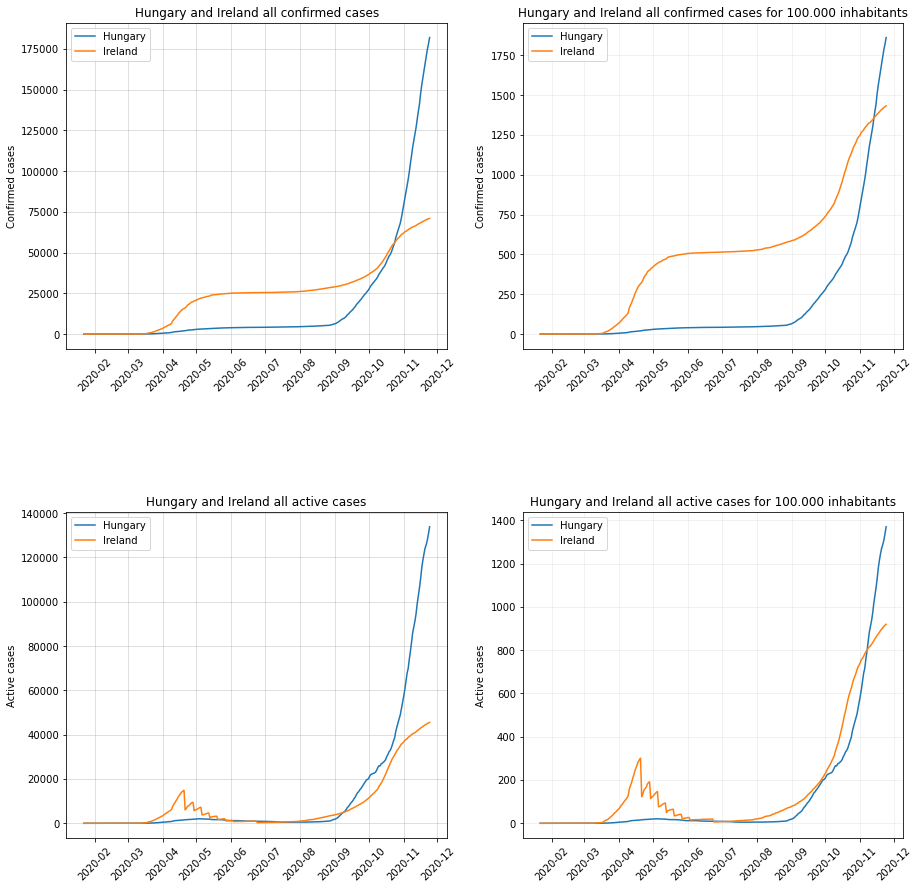

In [18]:
figure=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#first plot
#confirmed cases
data_plotter("cumulate",[2,2,1],all_data.Date, all_data.Hungary_C, all_data.Ireland_C, "Hungary and Ireland all confirmed cases", "Confirmed cases", ["Hungary", "Ireland"] )
#active cases
data_plotter("cumulate",[2,2,3],all_data.Date, all_data.Hungary_A, all_data.Ireland_A, "Hungary and Ireland all active cases", "Active cases", ["Hungary", "Ireland"] )
plt.show()

It's interesting that if we look at the total number of cases, there are currently more confirmed and active cases in Hungary.
However, if we look the cases for 100.000 inhabitants, it seems that the difference is smaller, in fact, before November the Hungarian cases for 100.000 inhabitants were smaller than Irish cases. The latter finding is also true for active cases.

However, it is important to note that since the number of tests and the rate of positive tests in Hungary and in Ireland are very different, it is not possible to say  anything with absolute certainty.

Next plots are for the deaths and recovered.

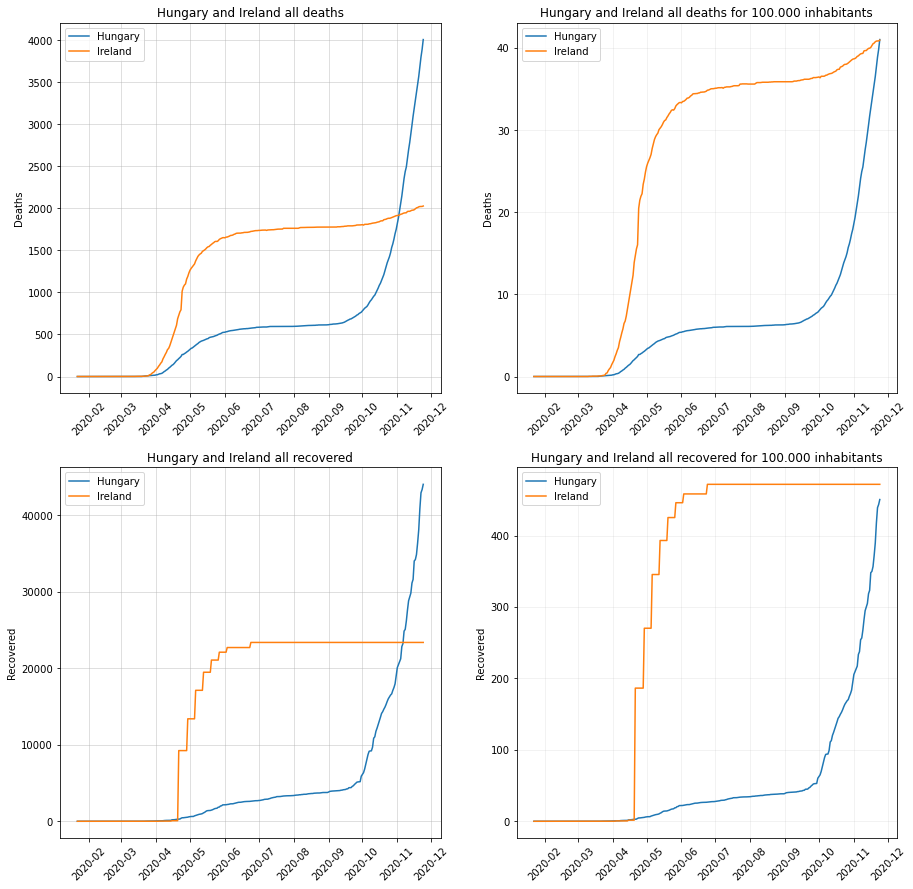

In [19]:
#plot2
figure2=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
#deaths
data_plotter("cumulate",[2,2,1],all_data.Date, all_data.Hungary_D, all_data.Ireland_D, "Hungary and Ireland all deaths", "Deaths", ["Hungary", "Ireland"] )
#recovered
data_plotter("cumulate",[2,2,3],all_data.Date, all_data.Hungary_R, all_data.Ireland_R, "Hungary and Ireland all recovered", "Recovered", ["Hungary", "Ireland"] )
plt.show()

The above findings are again true on the basis of the figures, if we look at the left side, we can see that the cumalted numbers are higher in Hungary but if we look at the right side, Ireland has the higher number of deaths and recovered for 100.000 inhabitants. 
In summary, the two figures above show that numbers in Ireland were worse in terms of population, but Hungary is catching up as both the number of active, infected people and deaths are growing exponentially.


Next step is to calculate the daily dataset for the confirmed, deaths,  recovered and active cases. It helps to see the changes in trends.

In [20]:
#calculate daily data

daily_confirmed_hun =[]
daily_confirmed_ie=[]
daily_deaths_hun=[]
daily_deaths_ie=[]
daily_recovered_hun=[]
daily_recovered_ie=[]
daily_active_hun=[]
daily_active_ie=[]

# choose the data for figures

for i in range(len(all_data[["Hungary_C"]])):
    if i == 0:
        daily_confirmed_hun.append(all_data[["Hungary_C"]].iat[i,0])
        daily_confirmed_ie.append(all_data[["Ireland_C"]].iat[i, 0])
        daily_deaths_hun.append(all_data[["Hungary_D"]].iat[i, 0])
        daily_deaths_ie.append(all_data[["Ireland_D"]].iat[i, 0])
        daily_recovered_hun.append(all_data[["Hungary_R"]].iat[i, 0])
        daily_recovered_ie.append(all_data[["Ireland_R"]].iat[i, 0])
        daily_active_hun.append(all_data[["Hungary_C"]].iat[i, 0]-all_data[["Hungary_D"]].iat[i, 0]-all_data[["Hungary_R"]].iat[i, 0])
        daily_active_ie.append(all_data[["Ireland_C"]].iat[i, 0]-all_data[["Ireland_D"]].iat[i, 0]-all_data[["Ireland_R"]].iat[i, 0])

    else:
        daily_confirmed_hun.append(all_data[["Hungary_C"]].iat[i, 0] - all_data[["Hungary_C"]].iat[i-1,0])
        daily_confirmed_ie.append(all_data[["Ireland_C"]].iat[i, 0] - all_data[["Ireland_C"]].iat[i-1,0])
        daily_deaths_hun.append(all_data[["Hungary_D"]].iat[i, 0] - all_data[["Hungary_D"]].iat[i-1,0])
        daily_deaths_ie.append(all_data[["Ireland_D"]].iat[i, 0] - all_data[["Ireland_D"]].iat[i-1,0])
        daily_recovered_hun.append(all_data[["Hungary_R"]].iat[i, 0] - all_data[["Hungary_R"]].iat[i-1,0])
        daily_recovered_ie.append(all_data[["Ireland_R"]].iat[i, 0] - all_data[["Ireland_R"]].iat[i-1,0])
        hu_act=(all_data[["Hungary_C"]].iat[i, 0] - all_data[["Hungary_C"]].iat[i-1,0])-(all_data[["Hungary_D"]].iat[i, 0] - all_data[["Hungary_D"]].iat[i-1,0])- (all_data[["Hungary_R"]].iat[i, 0] - all_data[["Hungary_R"]].iat[i-1,0])
        ie_act=(all_data[["Ireland_C"]].iat[i, 0] - all_data[["Ireland_C"]].iat[i-1,0])-(all_data[["Ireland_D"]].iat[i, 0] - all_data[["Ireland_D"]].iat[i-1,0])- (all_data[["Ireland_R"]].iat[i, 0] - all_data[["Ireland_R"]].iat[i-1,0])
        daily_active_hun.append(hu_act)
        daily_active_ie.append(ie_act)


After that, I can visualize the daily cases too. 

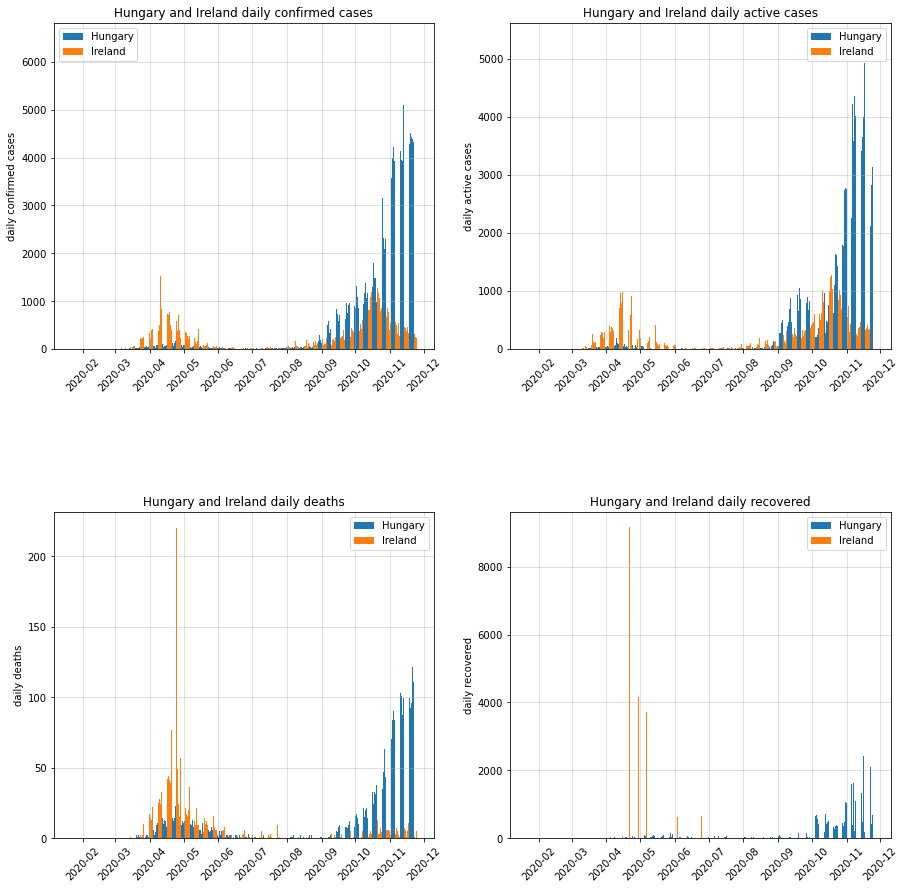

In [21]:
figure3=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

data_plotter("daily",[2,2,1],all_data.Date, daily_confirmed_hun, daily_confirmed_ie, "Hungary and Ireland daily confirmed cases", "daily confirmed cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,2],all_data.Date, daily_active_hun, daily_active_ie, "Hungary and Ireland daily active cases", "daily active cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,3],all_data.Date, daily_deaths_hun, daily_deaths_ie, "Hungary and Ireland daily deaths", "daily deaths", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,4],all_data.Date, daily_recovered_hun, daily_recovered_ie, "Hungary and Ireland daily recovered", "daily recovered", ["Hungary", "Ireland"] )
plt.show()

The figure shows that the first and second waves are clearly separated for both countries. It can also be seen that while in the first wave there were more daily cases in Ireland, in the second wave Hungary has more new and active cases and more deaths.

And now, let's see the daily cases for 100.000 inhabitants.

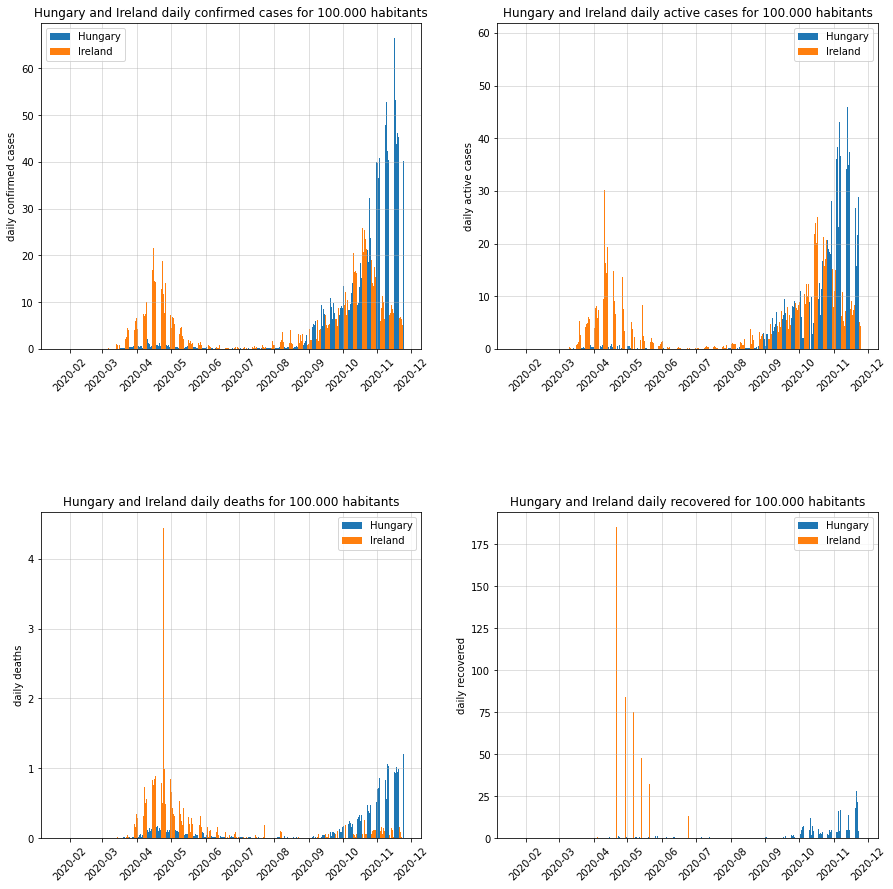

In [22]:
daily_confirmed_hun_100K = [case*hungarian_rate for case in daily_confirmed_hun]
daily_confirmed_ie_100K = [case*irish_rate for case in daily_confirmed_ie]
daily_deaths_hun_100K = [case*hungarian_rate for case in daily_deaths_hun]
daily_deaths_ie_100K = [case*irish_rate for case in daily_deaths_ie]
daily_recovered_hun_100K = [case*hungarian_rate for case in daily_recovered_hun]
daily_recovered_ie_100K = [case*irish_rate for case in daily_recovered_ie]
daily_active_hun_100K = [case*hungarian_rate for case in daily_active_hun]
daily_active_ie_100K = [case*irish_rate for case in daily_active_ie]

figure4=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

data_plotter("daily",[2,2,1],all_data.Date, daily_confirmed_hun_100K, daily_confirmed_ie_100K, "Hungary and Ireland daily confirmed cases for 100.000 habitants", "daily confirmed cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,2],all_data.Date, daily_active_hun_100K, daily_active_ie_100K, "Hungary and Ireland daily active cases for 100.000 habitants", "daily active cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,3],all_data.Date, daily_deaths_hun_100K, daily_deaths_ie_100K, "Hungary and Ireland daily deaths for 100.000 habitants", "daily deaths", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,4],all_data.Date, daily_recovered_hun_100K, daily_recovered_ie_100K, "Hungary and Ireland daily recovered for 100.000 habitants", "daily recovered", ["Hungary", "Ireland"] )
plt.show()


The data for 100,000 inhabitants looks more nuanced, but the previously mentioned trend remained, the first wave affected Ireland more, and it changed in the second wave.

After I get familiar with the data, it's time to write the SIR model and use that to predict the future.
If you are not familiar with the concept of SIR model please read the linked articles above from towardsdatascilence.com.
I decided to use a basic SIR (not SEIR or  SEICR model) because I want to predict the Infected numbers and the basic model is perfect for this and I can't find any public dataset about the occupied ICU beds and invasive ventillators. 

In [23]:
# gamma: how many days takes to recover
gamma = 1.0/9.0
# phi how many days takes to die
phi = 1.0/18.0
# alpha is the fatality rate
alpha=2.3/10.0
# population number
N_hungary=hungarian_population
N_ireland=irish_population
hungarian_green_list_limit=25.0 / hungarian_rate
irish_green_list_limit=25.0 / irish_rate

The SIR_Fitting class is responsible for build the SIR model and use that to predict the future cases.

In [28]:
class SIR_Fitting:

    #constructor
    def __init__ (self, country, N_country, green_list_limit, data_to_fit, outbreak_day, params_to_fit):
        self.country=country
        self.N_country=N_country
        self.green_list_limit=green_list_limit
        self.data_to_fit=data_to_fit
        self.outbreak_day=outbreak_day
        self.params_to_fit=params_to_fit
        # gamma: how many days takes to recover
        self.gamma = 1.0/9.0
        # phi how many days takes to die
        self.phi = 1.0/18.0
        # alpha is the fatality rate
        self.alpha=2.3/10.0

    #calculate the SIR model's elements on t day
    #S:susceptible, I: infected, R: recovered D:dead
    def deriv(self, y, t, beta):
        S, I, R, D = y
        dSdt = -beta(t) * I * S / self.N_country
        dIdt = beta(t) * I * S/ self.N_country - (self.gamma*(1-self.alpha)*I) - (self.phi*self.alpha*I)
        dRdt = self.gamma * self.alpha * I
        dDdt = self.phi * (1-self.alpha)*I
        return dSdt, dIdt,  dRdt, dDdt

    #R is the infection rate, it shows the velocity of the infection.
    #to model its changes I use a logistic function maybe there is a better option for the Irish data
    def logistic_R_0(self, t, R_0_start, k, x0, R_0_end):
        return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

    #Modeling the data using the SIR model
    def Model(self, days, R_0_start, k, x0, R_0_end):
        def beta(t):
            return self.logistic_R_0(t, R_0_start, k, x0, R_0_end) * self.gamma

        y0 = self.N_country-1.0, 1.0, 0.0, 0.0
        t = np.linspace(0, days-1, days)
        ret = odeint(self.deriv, y0, t, args=(beta, ))
        S, I, R, D = ret.T
        R_0_over_time = [beta(i)/self.gamma for i in range(len(t))]

        return t, S, I, R, D, R_0_over_time
    
    #plotting the Model's I (Infected) element over time
    def plotter(self, t, S, I, R, D, R_0, x_ticks=None):
    
        f, ax = plt.subplots(1,1,figsize=(20,4))
        if x_ticks is None:
            ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        else:
            ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
            f.autofmt_xdate()

        ax.title.set_text('The SIR-Model prediction of '+ self.country)
        ax.grid(b=True, alpha=0.5)
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.show()


    #fitting the model to a whole dataset
    def fitter(self,x, R_0_start, k, x0, R_0_end):
            days = self.outbreak_day + len(self.data_to_fit)
            ret = self.Model(days, R_0_start, k, x0, R_0_end)
            # index=2 -> returns the model's I element
            return ret[2][x]

    #fitting the model to the actual dataset
    def fitting_model(self):

        days = self.outbreak_day + len(self.data_to_fit)
        if self.outbreak_day >= 0:
            y_data = np.concatenate((np.zeros(self.outbreak_day), self.data_to_fit))
        else:
            y_data = y_data[-self.outbreak_day:]

        x_data = np.linspace(0, days - 1, days, dtype=int)  

        #start to find the best model by try to find the parameters' best value 
        # the method is least squares -> the square of the diffenrence between the original and the predicted data point
        #need to be the least.
        mod = lmfit.Model(self.fitter)

        for kwarg, (init, mini, maxi) in self.params_to_fit.items():
            mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

        params = mod.make_params()
        
        #print aut the result and the original data
        result = mod.fit(y_data, params, method="least_squares", x=x_data)
        #print(result.best_values)
        result.plot_fit(datafmt="-")
        plt.title("Fitting the model to {}'s data".format(self.country))
        plt.grid(b=True, alpha=0.5)
        plt.show()


        #plots the prediction of the infection 
        full_days = 650
        first_date = np.datetime64(all_data.Date.min()) - np.timedelta64(self.outbreak_day,'D')
        x_ticks = pd.date_range(start=first_date, periods=full_days, freq="D")
        # Model(self, days, R_0_start, k, x0, R_0_end):
        prediction_country = self.Model(full_days, **result.best_values)
        self.plotter(*prediction_country, x_ticks=x_ticks)

        #calculate the daily new cases
        
        active_cases_pred=prediction_country[2]
        daily_prediction_country=[]

        for i in range(len(active_cases_pred)):
            if i == 0:
                daily_prediction_country.append(active_cases_pred[i])
            else:
                daily_prediction_country.append(active_cases_pred[i]-active_cases_pred[i-1])

        #calculate the "green list point for the country"
        count=daily_prediction_country.index(max(daily_prediction_country)) #after max

        #find the first element that is above of the limit after the peak
        while(daily_prediction_country[count] > self.green_list_limit and count <= len(daily_prediction_country)):
            count+=1

        green_list_limit_index=count

        #figure_prob, ax_prob =plt.subplots(1,1 figsize=(20,20))
        figure_prob=plt.figure(figsize=(20,20))
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        ax_prob=plt.subplot(2,1,1)
        plt.hlines(y = self.green_list_limit, xmin = x_ticks[0], xmax = x_ticks[-2], color='g')
        plt.bar(x_ticks, daily_prediction_country, width=0.5)
        plt.title("{} predicted daily new cases".format(self.country))
        plt.ylabel("daily new cases")
        ax_prob.xaxis.set_major_locator(mdates.MonthLocator())
        ax_prob.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax_prob.xaxis.set_minor_locator(mdates.MonthLocator())
        figure_prob.autofmt_xdate()
        plt.grid(b=True, alpha=0.5)
        plt.xticks(rotation=45)
        plt.ylim( ymin = 0)
        plt.xlim(x_ticks[40], x_ticks[500])

        ##zoom in
        #figure_zoom, ax_zoom =plt.subplots(1,1 figsize=(20,20))
        ax_zoom=plt.subplot(2,1,2)
        plt.hlines(y = self.green_list_limit, xmin = x_ticks[0], xmax = x_ticks[-2], color='g')
        plt.bar(x_ticks, daily_prediction_country, width=0.5)
        plt.title("{} predicted daily inflected cases".format(self.country))
        plt.ylabel("daily inflected cases")
        ax_zoom.xaxis.set_major_locator(mdates.DayLocator())
        ax_zoom.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.grid(b=True, alpha=0.5)
        plt.xticks(rotation=45)
        plt.ylim( ymin = 0, ymax=self.green_list_limit+500)
        plt.xlim(x_ticks[green_list_limit_index-3], x_ticks[green_list_limit_index+10])
        plt.show()

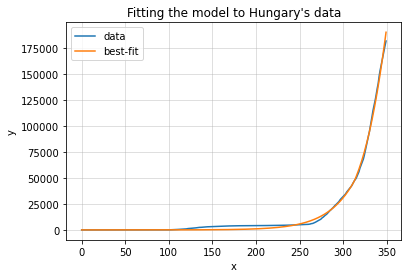

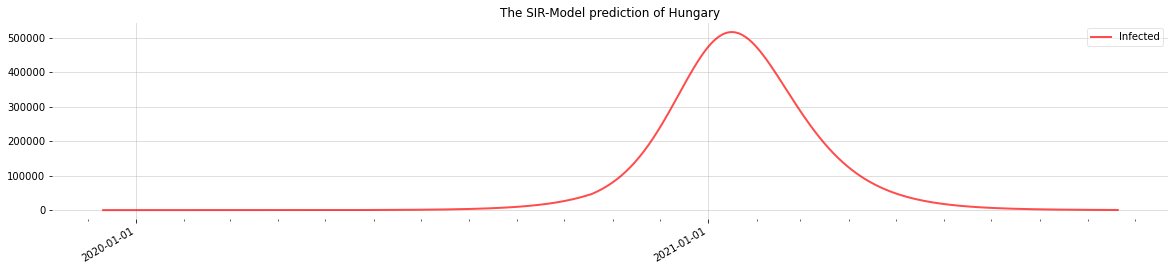

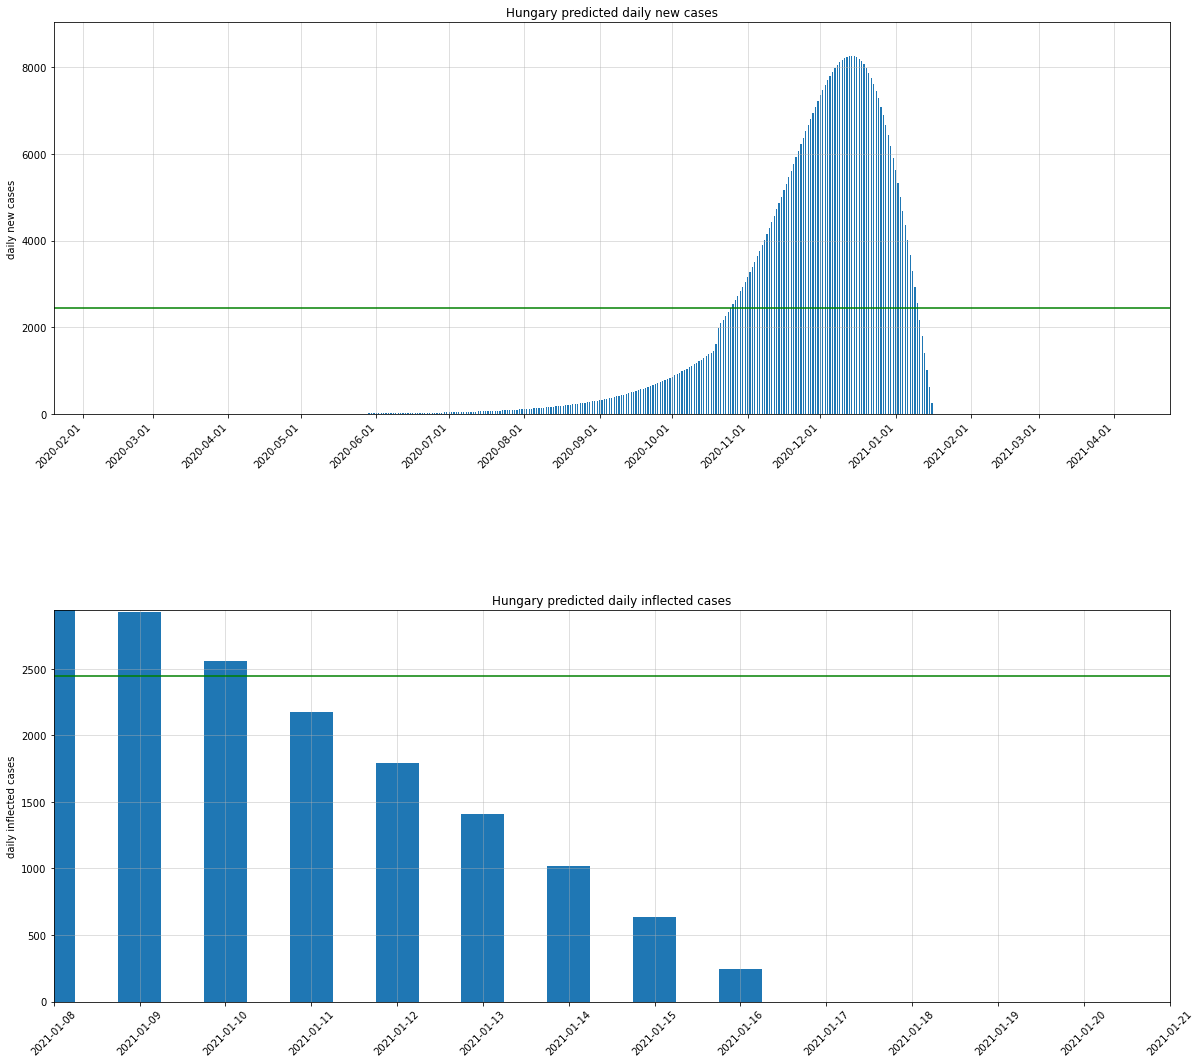

In [25]:
Hungarian_modell=SIR_Fitting("Hungary",N_hungary,hungarian_green_list_limit, all_data.Hungary_C, 42, {"R_0_start": (1.2, 1.0, 2.0), "k": (20.0, 1.0, 100.0), "x0": (150, 100, 400), "R_0_end": (0.8, 0.5, 2.0)})
Hungarian_modell.fitting_model()

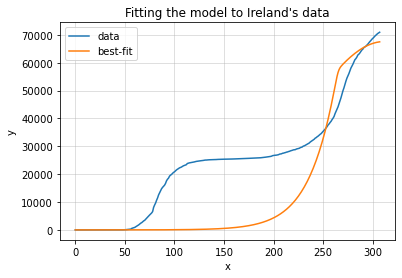

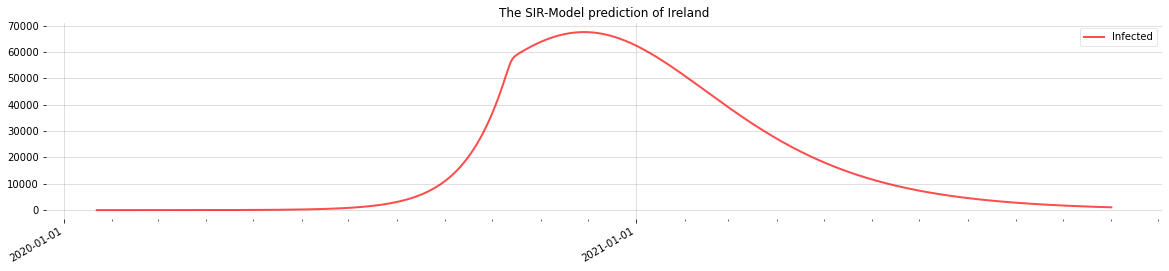

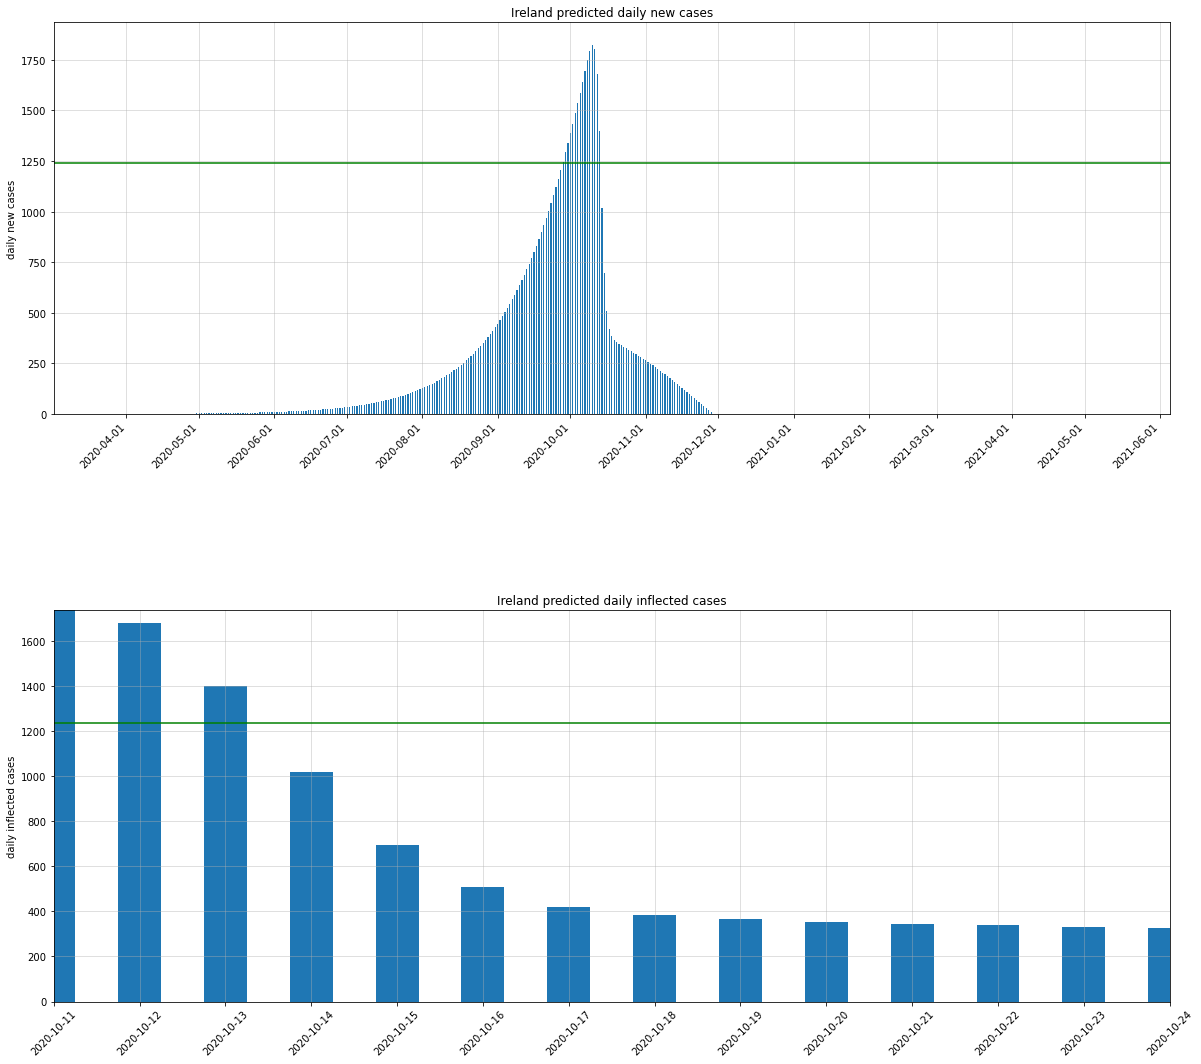

In [27]:
Irish_modell = SIR_Fitting("Ireland",N_ireland,irish_green_list_limit, all_data.Ireland_C, 0, {"R_0_start": (1.5, 1.2, 2.0), "k": (40.0, 1.0, 100.0), "x0": (270, 265, 400), "R_0_end": (1.1, 0.98, 2.0)})
Irish_modell.fitting_model()

It is clear from the figures that the pandemic in Hungary is expected to decrease to a sufficient extent in mid-January.
Meanwhile, in Ireland, the data are now below the values set by the EU. 
Both countries plan to start a new lockdown from January. Presumably it will also take a month or a month and a half, so , maybe  we can visit home on March.

Possibilities for further development of the project (plans for the future):
    * error handling
    * data cleaning
    * test the prediction part of the program 
    * use some other library for the plots ( there is a tableau lib named tabpy that I want to try )